In [4]:
# Import basic libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os 
from pathlib import Path

# Load in excel file and define future save directory
indonesia = pd.ExcelFile("DENGUE MONTHLY DATA.xlsx")

directory_path = "D:\Projects\TMU\gee_dengue\Dengue_IN\env_data"
files = os.listdir(directory_path)

# Loop through files and process CSV files
for file in files:
    if file.endswith('.csv'):
        # Create the variable name based on the file name (without extension)
        dataframe_name = file.split('.')[0].lower()
        
        # Load the CSV file into a DataFrame
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path)
        
        # Assign the DataFrame to the variable name in globals
        globals()[dataframe_name] = df
        
        # Print out the name of the dataframe and check the dataframe content
        print(f'DataFrame created: {dataframe_name}') # To check the first few rows of the DataFrame


# Clean up columns and combine yearly data
era_2010_2023.columns = era_2010_2023.columns.str.replace(r"_Dropdown\(description='Statistics', options=\('MEAN', 'MAXIMUM', 'MINIMUM', 'MEDIAN', 'STD', 'VARIANCE', 'SUM'\), value='MEAN'\)", "_MEAN", regex=True)
lst = pd.concat([lst_2010_2019,lst_2020_2023])
# prec = pd.concat([prec_2010_2012,prec_2013_2015,prec_2016_2019,prec_2020_2024])

# print('All dataframes loaded and cleaned.')

# # Ensure 'Date' is in datetime format
# era_2010_2023['Date'] = pd.to_datetime(era_2010_2023['Date'])
# ndvi_all['Date'] = pd.to_datetime(ndvi_all['Date'])
# lst['Date'] = pd.to_datetime(lst['Date'])
# prec['Date'] = pd.to_datetime(prec['Date'])
# # Extract the year from the 'Date' column
# era_2010_2023['Year'] = era_2010_2023['Date'].dt.year
# ndvi_all['Year'] = ndvi_all['Date'].dt.year
# lst['Year'] = lst['Date'].dt.year
# prec['Year'] = prec['Date'].dt.year

print('Conversion of Datetime complete.')

DataFrame created: era5_temp_2000_2009
DataFrame created: era_1993_1999
DataFrame created: era_2005_2009
DataFrame created: era_2010_2023
DataFrame created: lst_2010_2019
DataFrame created: lst_2020_2023
DataFrame created: lulc_100
DataFrame created: lulc_200
DataFrame created: ndvi_all
DataFrame created: prec_1993_2001
DataFrame created: prec_2002_2009
DataFrame created: prec_2010_2012
DataFrame created: prec_2013_2015
DataFrame created: prec_2016_2019
DataFrame created: prec_2020_2024
Conversion of Datetime complete.


In [6]:
prec = pd.concat([prec_1993_2001, prec_2002_2009,prec_2010_2012,prec_2013_2015,prec_2016_2019,prec_2020_2024])

In [12]:
era_2010_2023 = era_2010_2023.drop(columns=['total_evaporation_sum_MEAN','total_precipitation_sum_MEAN'])

In [ ]:
import pandas as pd

# Merging era_1993_1999 with era_2005_2009, selecting only relevant columns
merged_df1 = pd.merge(era_1993_1999, era_2005_2009[['Date', 'ID_2', 'Doy', 'potential_evaporation_sum_MEAN']],
                      on=['Date', 'ID_2', 'Doy'], how='outer')

# Merging the result with era5_temp_2000_2009, selecting only relevant columns
final_df = pd.merge(merged_df1, era5_temp_2000_2009[['Date', 'ID_2', 'Doy', 'temperature_2m_MEAN', 
                                                     'temperature_2m_min_MEAN', 'temperature_2m_max_MEAN']],
                     on=['Date', 'ID_2', 'Doy'], how='outer')

# Fill missing values from columns with the other column values where necessary
final_df['temperature_2m_MEAN'] = final_df['temperature_2m_MEAN_x'].fillna(final_df['temperature_2m_MEAN_y'])
final_df['temperature_2m_min_MEAN'] = final_df['temperature_2m_min_MEAN_x'].fillna(final_df['temperature_2m_min_MEAN_y'])
final_df['temperature_2m_max_MEAN'] = final_df['temperature_2m_max_MEAN_x'].fillna(final_df['temperature_2m_max_MEAN_y'])
final_df['potential_evaporation_sum_MEAN'] = final_df['potential_evaporation_sum_MEAN_x'].fillna(final_df['potential_evaporation_sum_MEAN_y'])

# Drop the old '_x' and '_y' columns
final_df = final_df.drop(columns=['temperature_2m_MEAN_x', 'temperature_2m_MEAN_y', 
                                  'temperature_2m_min_MEAN_x', 'temperature_2m_min_MEAN_y',
                                  'temperature_2m_max_MEAN_x', 'temperature_2m_max_MEAN_y',
                                  'potential_evaporation_sum_MEAN_x', 'potential_evaporation_sum_MEAN_y'])

# Display the final dataframe
print(final_df)


In [15]:
era_1993_2023 = pd.concat([final_df,era_2010_2023])

In [ ]:
# Step 1: Group by 'Date' and count unique 'ID_2' for each 'Date'
unique_id_count_per_date = era_1993_2023.groupby('Date')['ID_2'].nunique()

# Step 2: Check if the count of unique 'ID_2' for each 'Date' is 444
incorrect_dates = unique_id_count_per_date[unique_id_count_per_date != 444]

# Step 3: Output the result
incorrect_dates


Date
2010/01/01    438
2010/01/02    438
2010/01/03    438
2010/01/04    438
2010/01/05    438
             ... 
2023/12/27    438
2023/12/28    438
2023/12/29    438
2023/12/30    438
2023/12/31    438
Name: ID_2, Length: 5113, dtype: int64

In [ ]:
era_1993_1999 

,Date,Doy,temperature_2m_MEAN,temperature_2m_min_MEAN,temperature_2m_max_MEAN,potential_evaporation_sum_MEAN,ID_2
0,1993/01/01,1,293.859194,290.127877,297.856811,-0.010296,1
1,1993/01/01,1,294.732465,291.245360,298.624377,-0.009332,2
2,1993/01/01,1,297.842348,295.385172,300.870153,-0.011643,3
3,1993/01/01,1,296.872732,294.060947,300.469734,-0.010711,4
4,1993/01/01,1,293.952229,290.262204,297.857693,-0.010373,5
...,...,...,...,...,...,...,...
1337767,2006/12/31,365,297.381194,295.709316,300.910266,-0.004277,440
1337768,2006/12/31,365,297.381194,295.709316,300.910266,-0.004277,441
1337769,2006/12/31,365,297.381194,295.709316,300.910266,-0.004277,442
1337770,2006/12/31,365,297.381194,295.709316,300.910266,-0.004277,443


In [ ]:
era_1993_2023

,Date,Doy,ID_2,temperature_2m_MEAN,temperature_2m_min_MEAN,temperature_2m_max_MEAN,potential_evaporation_sum_MEAN
0,1993/01/01,1,1,293.859194,290.127877,297.856811,-0.010296
1,1993/01/01,1,2,294.732465,291.245360,298.624377,-0.009332
2,1993/01/01,1,3,297.842348,295.385172,300.870153,-0.011643
3,1993/01/01,1,4,296.872732,294.060947,300.469734,-0.010711
4,1993/01/01,1,5,293.952229,290.262204,297.857693,-0.010373
...,...,...,...,...,...,...,...
2239489,2023/12/31,365,439,296.288325,294.720631,299.149380,-0.002078
2239490,2023/12/31,365,440,299.578799,296.922490,304.438547,-0.007260
2239491,2023/12/31,365,441,299.578799,296.922490,304.438547,-0.007260
2239492,2023/12/31,365,442,299.578799,296.922490,304.438547,-0.007260


In [ ]:
era_1993_1999['ID_2'].nunique()

444

In [ ]:
era5_temp_2000_2009['ID_2'].nunique()

444

In [ ]:
era_1993_2023

NameError: name 'era_1993_2023' is not defined

In [ ]:
era_2010_2023['ID_2'].nunique()

438

In [24]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from tqdm import tqdm  # Import tqdm for progress bars

# Load shapefile
in_shp = in_shp.to_crs(epsg=3857)  # Use projected CRS

# Compute centroids
in_shp["centroid"] = in_shp.geometry.centroid

# Define missing ID_2 values
missing_ids = {89, 98, 160, 171, 434, 444}

# Find non-missing polygons
non_missing_polygons = in_shp[~in_shp["ID_2"].isin(missing_ids)]

# Find nearest polygon for each missing ID_2
nearest_mapping = {}

print("Finding nearest polygons for missing ID_2 values...")
for ID in tqdm(missing_ids, desc="Computing nearest polygons"):
    missing_centroid = in_shp[in_shp["ID_2"] == ID].centroid.iloc[0]
    
    # Compute distances
    non_missing_polygons["distance"] = non_missing_polygons["centroid"].distance(missing_centroid)
    
    # Find closest polygon and store its ID_2
    nearest_mapping[ID] = non_missing_polygons.loc[non_missing_polygons["distance"].idxmin(), "ID_2"]


# Identify all unique dates
unique_dates = era_1993_2023["Date"].unique()

# Identify the statistics columns
stats_columns = [
    "temperature_2m_MEAN",
    "temperature_2m_min_MEAN",
    "temperature_2m_max_MEAN",
    "potential_evaporation_sum_MEAN",
]

# Prepare missing rows
missing_rows = []
total_rows = 0  # Counter for total processed rows

print("\nDuplicating rows for missing values...")
for missing_ID in tqdm(missing_ids, desc="Processing missing ID_2"):
    nearest_ID = nearest_mapping[missing_ID]  # Get the nearest valid polygon's ID_2

    # Get all rows for the nearest polygon
    nearest_rows = era_1993_2023[era_1993_2023["ID_2"] == nearest_ID]

    # Duplicate rows, altering only ID_2
    for date in tqdm(unique_dates, desc=f"Assigning dates for ID_2={missing_ID}", leave=False):
        if not ((era_1993_2023["ID_2"] == missing_ID) & (era_1993_2023["Date"] == date)).any():
            # Find the row with the same date in the nearest polygon's data
            match = nearest_rows[nearest_rows["Date"] == date]
            if not match.empty:
                new_row = match.iloc[0].copy()
                new_row["ID_2"] = missing_ID
                missing_rows.append(new_row)
                total_rows += 1  # Increment row counter

    tqdm.write(f"✅ Finished ID_2={missing_ID}, total rows processed: {total_rows}")

# Convert to DataFrame
missing_df = pd.DataFrame(missing_rows)

# Append to original dataset
era_1993_2023 = pd.concat([era_1993_2023, missing_df], ignore_index=True)

# Save the updated dataset
era_1993_2023.to_csv("updated_era_1993_2023.csv", index=False)

print(f"\n✅ Process completed! {total_rows} rows added.")
print("Updated file saved as 'updated_era_1993_2023.csv'.")


Finding nearest polygons for missing ID_2 values...


Computing nearest polygons:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\Patrick\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
Computing nearest polygons: 100%|██████████| 6/6 [00:00<00:00, 573.11it/s]



Duplicating rows for missing values...


Processing missing ID_2:   0%|          | 0/6 [04:46<?, ?it/s]


KeyboardInterrupt: 

In [26]:
# Save the updated dataset
era_1993_2023.to_csv("updated_era_1993_2023.csv", index=False)

In [ ]:
# Step 1: Get unique ID_2 values from both dataframes
id_2_1993_2023 = prec['ID_2'].unique()
id_2_2020_2024 = prec_2020_2024['ID_2'].unique()

# Step 2: Find ID_2 values in era_1993_2023 that are not in era_2010_2023
missing_id_2 = set(id_2_1993_2023) - set(id_2_2020_2024)

# Step 3: Output the missing ID_2 values
missing_id_2


{89, 98, 160, 171, 434, 444}

In [ ]:
# Step 1: Get unique ID_2 values from both dataframes
id_2_1993_2023 = era_1993_2023['ID_2'].unique()
id_2_2010_2023 = era_2010_2023['ID_2'].unique()

# Step 2: Find ID_2 values in era_1993_2023 that are not in era_2010_2023
missing_id_2 = set(id_2_1993_2023) - set(id_2_2010_2023)

# Step 3: Output the missing ID_2 values
missing_id_2


{89, 98, 160, 171, 434, 444}

In [ ]:
era_20_2023

,Date,Doy,temperature_2m_MEAN,temperature_2m_min_MEAN,temperature_2m_max_MEAN,potential_evaporation_sum_MEAN,ID_2
0,2010/01/01,1,294.854096,291.632341,298.390060,-0.010447,1
1,2010/01/01,1,295.434910,291.816788,299.726999,-0.009748,2
2,2010/01/01,1,298.428475,296.414033,301.314765,-0.013074,3
3,2010/01/01,1,297.612716,294.959009,301.244737,-0.011746,4
4,2010/01/01,1,294.989767,291.892148,298.315877,-0.010622,5
...,...,...,...,...,...,...,...
2239489,2023/12/31,365,296.288325,294.720631,299.149380,-0.002078,439
2239490,2023/12/31,365,299.578799,296.922490,304.438547,-0.007260,440
2239491,2023/12/31,365,299.578799,296.922490,304.438547,-0.007260,441
2239492,2023/12/31,365,299.578799,296.922490,304.438547,-0.007260,442


In [ ]:
prec['ID_2'].nunique()

438

In [ ]:
in_shp['Region'].unique()

array(['Sumatra', 'Nusa Tenggara', 'Java', 'Sulawesi', 'Unknown', 'Papua',
       'Kalimantan', 'Maluku Islands'], dtype=object)

In [27]:
in_shp

,NAME_0,NAME_1,ID_2,NAME_2,ENGTYPE_2,VARNAME_2,InPoly_FID,MaxSimpTol,MinSimpTol,NEW_ID,geometry,centroid
0,Indonesia,Aceh,1,Aceh Barat Daya,Regency,South West Aceh,0,0.008993,0.008993,1,"MULTIPOLYGON (((10787496.652 401152.544, 10786...",POINT (10788383.662 421895.507)
1,Indonesia,Aceh,2,Aceh Barat,Regency,West Aceh,1,0.008993,0.008993,2,"POLYGON ((10750263.326 510304.553, 10747695.04...",POINT (10706456.843 495974.368)
2,Indonesia,Aceh,3,Aceh Besar,Regency,None,2,0.008993,0.008993,3,"MULTIPOLYGON (((10572434.279 645475.658, 10572...",POINT (10632843.02 599466.872)
3,Indonesia,Aceh,4,Aceh Jaya,Regency,None,3,0.008993,0.008993,4,"MULTIPOLYGON (((10668816.276 490746.772, 10664...",POINT (10649403.646 540087.678)
4,Indonesia,Aceh,5,Aceh Selatan,Regency,South Aceh,4,0.008993,0.008993,5,"MULTIPOLYGON (((10870936.162 289684.835, 10870...",POINT (10847161.493 351877.394)
...,...,...,...,...,...,...,...,...,...,...,...,...
439,Indonesia,Yogyakarta,440,Bantul,Regency,None,439,0.008993,0.008993,440,"POLYGON ((12268607.607 -891459.474, 12270803.8...",POINT (12285060.892 -882705.333)
440,Indonesia,Yogyakarta,441,Gunung Kidul,Regency,None,440,0.008993,0.008993,441,"POLYGON ((12323294.904 -914271.057, 12321892.7...",POINT (12313376.888 -892871.689)
441,Indonesia,Yogyakarta,442,Kulon Progo,Regency,None,441,0.008993,0.008993,442,"MULTIPOLYGON (((12260839.906 -854138.942, 1226...",POINT (12264311.713 -873018.902)
442,Indonesia,Yogyakarta,443,Sleman,Regency,None,442,0.008993,0.008993,443,"POLYGON ((12272258.749 -872875.329, 12272064.2...",POINT (12288449.992 -861665.003)


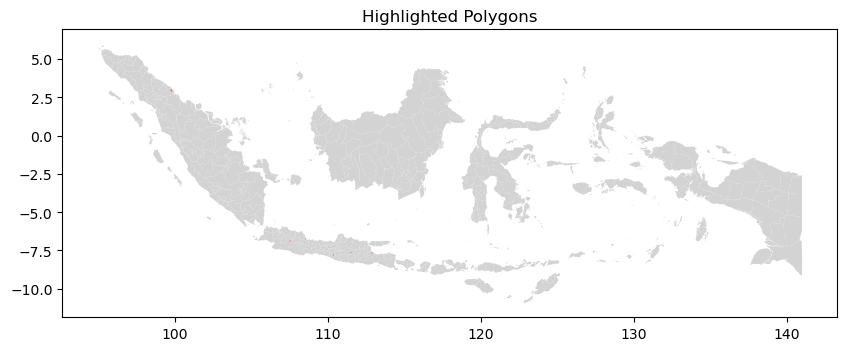

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Filter the polygons with the specified IDs
highlight_ids = [89, 98, 160, 171, 434, 444]
highlight_gdf = in_shp[in_shp['ID_2'].isin(highlight_ids)]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all polygons
in_shp.plot(ax=ax, color='lightgrey', edgecolor='none')

# Highlight the specific polygons
highlight_gdf.plot(ax=ax, color='red', edgecolor='none', linewidth=2)

# Display the plot
plt.title('Highlighted Polygons')
plt.show()


In [ ]:
era_1993_2023.to_csv('era_1993_2023.csv',index=False)

               Date  Doy  ID_2  temperature_2m_MEAN  temperature_2m_min_MEAN  \
0        1993/01/01    1     1           293.859194               290.127877   
1        1993/01/01    1     2           294.732465               291.245360   
2        1993/01/01    1     3           297.842348               295.385172   
3        1993/01/01    1     4           296.872732               294.060947   
4        1993/01/01    1     5           293.952229               290.262204   
...             ...  ...   ...                  ...                      ...   
2756791  2009/12/31  365   440           297.959067               295.330833   
2756792  2009/12/31  365   441           297.959067               295.330833   
2756793  2009/12/31  365   442           297.959067               295.330833   
2756794  2009/12/31  365   443           297.959067               295.330833   
2756795  2009/12/31  365   444           297.959067               295.330833   

         temperature_2m_max_MEAN  poten

6209.0

In [ ]:
print(era_1993_1999.columns)
print(era_2005_2009.columns)
print(era5_temp_2000_2009.columns)

print(len(era_1993_1999))
print(len(era_2005_2009))
print(len(era5_temp_2000_2009))

Index(['Date', 'Doy', 'temperature_2m_MEAN', 'temperature_2m_min_MEAN',
       'temperature_2m_max_MEAN', 'potential_evaporation_sum_MEAN', 'ID_2'],
      dtype='object')
Index(['Date', 'Doy', 'potential_evaporation_sum_MEAN', 'ID_2'], dtype='object')
Index(['Date', 'Doy', 'temperature_2m_MEAN', 'temperature_2m_min_MEAN',
       'temperature_2m_max_MEAN', 'ID_2'],
      dtype='object')
1337772
1621932
1621932


In [ ]:
merged_df

,Date,Doy_era_1993_1999,temperature_2m_MEAN,temperature_2m_min_MEAN,temperature_2m_max_MEAN,potential_evaporation_sum_MEAN_era_1993_1999,ID_2,Doy_era_2005_2009,potential_evaporation_sum_MEAN_era_2005_2009,Doy,temperature_2m_MEAN_era5_temp_2000_2009,temperature_2m_min_MEAN_era5_temp_2000_2009,temperature_2m_max_MEAN_era5_temp_2000_2009
0,1993/01/01,1.0,293.859194,290.127877,297.856811,-0.010296,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1993/01/01,1.0,294.732465,291.245360,298.624377,-0.009332,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1993/01/01,1.0,297.842348,295.385172,300.870153,-0.011643,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1993/01/01,1.0,296.872732,294.060947,300.469734,-0.010711,4,NaN,NaN,NaN,NaN,NaN,NaN
4,1993/01/01,1.0,293.952229,290.262204,297.857693,-0.010373,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,2009/12/31,NaN,NaN,NaN,NaN,NaN,440,365.0,-0.005309,365.0,297.959067,295.330833,302.261478
2756792,2009/12/31,NaN,NaN,NaN,NaN,NaN,441,365.0,-0.005309,365.0,297.959067,295.330833,302.261478
2756793,2009/12/31,NaN,NaN,NaN,NaN,NaN,442,365.0,-0.005309,365.0,297.959067,295.330833,302.261478
2756794,2009/12/31,NaN,NaN,NaN,NaN,NaN,443,365.0,-0.005309,365.0,297.959067,295.330833,302.261478


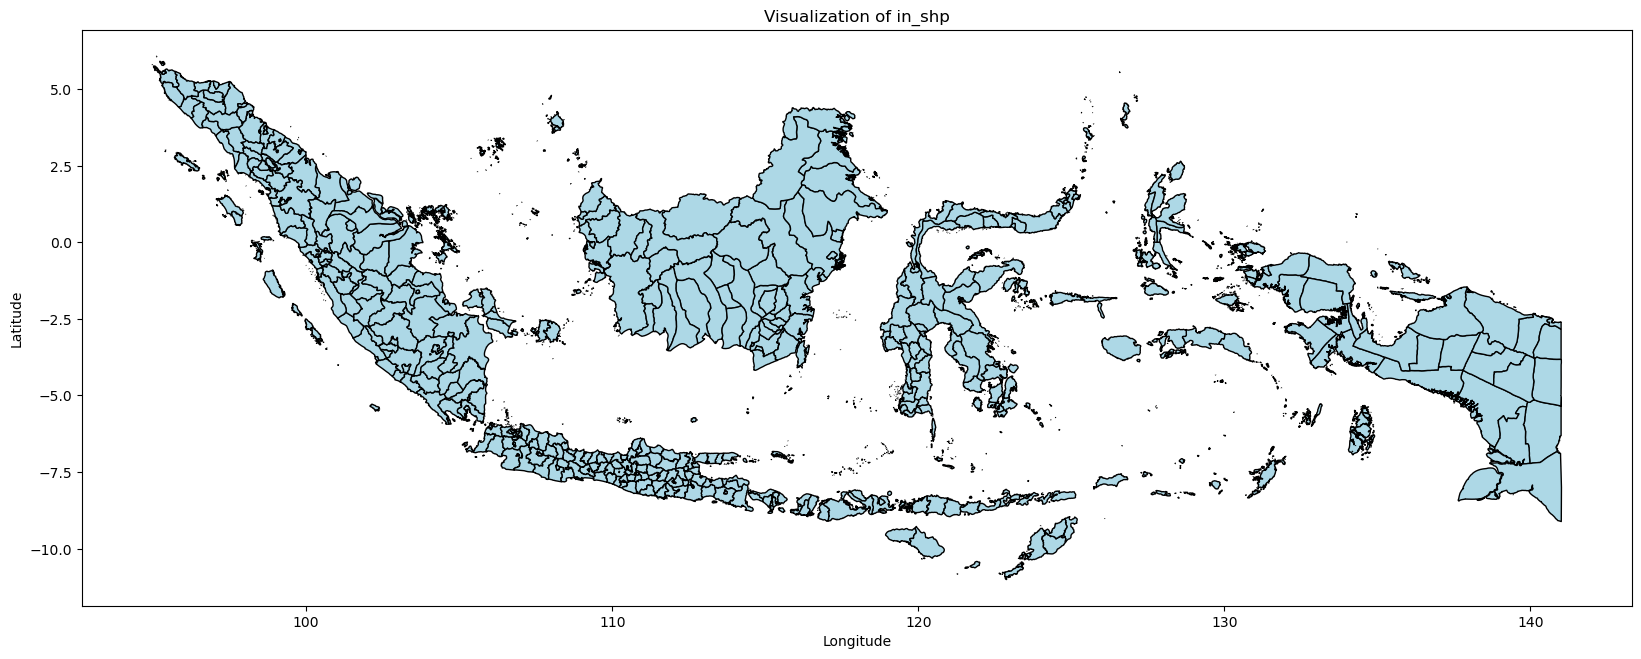

In [18]:
# Read in Indonesia shapefile
in_shp = gpd.read_file(r"D:\Projects\TMU\gee_dengue\Dengue_IN\in_shp\Simplify_IDN")
fig, ax = plt.subplots(figsize=(20, 10))
in_shp.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Visualization of in_shp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Define save directory
save_dir = r'D:\Projects\TMU\Indonesia_Dengue\Graphs_2'

Visualize null values for precipitation.

In [ ]:
# Define the column to check for null values
column_to_check = 'precipitation_MEAN'

# Create an empty dictionary to store plots for each year
for year, group in prec.groupby('Year'):
    plt.figure(figsize=(10, 6))
    
    # Count the number of null values for each day in the column
    null_count = group[column_to_check].isnull().groupby(group['Date']).sum()
    
    # Plot the null count
    plt.plot(null_count.index, null_count, label=column_to_check, color='blue')
    
    # Add title and labels
    plt.title(f"Null Value Count (Precipitation) for Each Day in {year}")
    plt.xlabel('Date')
    plt.ylabel('Null Value Count')
    plt.legend()

    # Save the plot for the year
    save_path = f"{save_dir}/nulls_per_day_{year}_precipitation.png"
    plt.savefig(save_path)
    plt.close()  # Close the plot to avoid displaying it inline


In [ ]:
# Now check by ID, creating one bar plot for each year
# Iterate over each year and create the plot
for year, group in prec.groupby('Year'):
    # Initialize a plot for the current year
    plt.figure(figsize=(12, 6))
    
    # Initialize a list to store the null counts
    null_counts_precipitation = []
    id_2_values = []

    # Iterate over each unique 'ID_2' and calculate the null counts
    for id_2, sub_group in group.groupby('ID_2'):
        # Count null values for 'precipitation_MEAN' for the current 'ID_2'
        null_count_precipitation = sub_group['precipitation_MEAN'].isnull().sum()

        # Store the null counts and 'ID_2'
        null_counts_precipitation.append(null_count_precipitation)
        id_2_values.append(id_2)

    # Create the bar plot
    width = 0.35  # Bar width
    x = range(len(id_2_values))  # X positions for bars

    # Bar plot for 'precipitation_MEAN'
    plt.bar(x, null_counts_precipitation, width, label='precipitation_MEAN Nulls', color='blue')

    # Add labels and title
    plt.xlabel('ID_2')
    plt.ylabel('Null Value Count')
    plt.title(f'Null Value Counts (Prec) for Each ID_2 in {year}')
    plt.xticks([p + width / 2 for p in x], id_2_values, rotation=45)
    plt.legend()

    # Save the plot for the current year
    save_path = f"{save_dir}/nulls_per_id_{year}_prec.png"
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.savefig(save_path)
    plt.close()  # Close the plot to avoid displaying it inline

Visualise null values for NDVI.

In [ ]:
# Define columns (NDVI_MEAN and EVI_MEAN)
columns_to_check = ['NDVI_MEAN', 'EVI_MEAN']
colors = ['red', 'blue']
labels = ['NDVI_MEAN', 'EVI_MEAN']

# Iterate over each year to create plots of time
for year, group in ndvi_all.groupby('Year'):
    plt.figure(figsize=(10, 6))

    null_percentages = {}  # Store null percentages for each column
    total_counts = group['Date'].value_counts().sort_index()  # Total entries per day
    
    for column, color, label in zip(columns_to_check, colors, labels):
        # Calculate null counts and convert to percentage
        null_counts = group[column].isnull().groupby(group['Date']).sum()
        null_percentages[column] = (null_counts / total_counts * 100).sort_index()
        
        # Plot each percentage curve
        plt.plot(null_percentages[column].index, null_percentages[column], label=label, color=color)

    # Highlight overlapping regions where both columns have the same percentage of missing data
    if 'NDVI_MEAN' in null_percentages and 'EVI_MEAN' in null_percentages:
        overlap = null_percentages['NDVI_MEAN'] == null_percentages['EVI_MEAN']
        plt.fill_between(null_percentages['NDVI_MEAN'].index, null_percentages['NDVI_MEAN'], 
                         where=overlap, color='gray', alpha=0.3, label="Overlap")

    # Update plot title, labels, and legend
    plt.title(f"Missing Data Percentage (NDVI & EVI) for Each Day in {year}")
    plt.xlabel('Date')
    plt.ylabel('Missing Data Percentage (%)')
    plt.legend()

    # Force y-axis to always go from 0 to 100%
    plt.ylim(0, 100)

    # Save the plot
    save_path = f"{save_dir}/nulls_percentage_per_day_{year}_ndvi.png"
    plt.savefig(save_path)
    plt.close()


In [ ]:
# Now check by ID, creating one bar plot for each year
# Iterate over each year and create the plot
for year, group in ndvi_all.groupby('Year'):
    # Initialize a plot for the current year
    plt.figure(figsize=(12, 6))

    # Initialize lists to store null counts and ID_2 values
    null_counts = []
    id_2_values = []

    # Iterate over each unique 'ID_2' and calculate the null counts
    for id_2, sub_group in group.groupby('ID_2'):
        # Count null values for 'NDVI_MEAN' (since EVI_MEAN is redundant)
        null_count = sub_group['EVI_MEAN'].isnull().sum()

        # Store the null count and 'ID_2'
        null_counts.append(null_count)
        id_2_values.append(id_2)

    # Create the bar plot
    plt.bar(id_2_values, null_counts, color='red', label='Null Counts (NDVI & EVI)')

    # Add labels and title
    plt.xlabel('ID_2')
    plt.ylabel('Null Value Count')
    plt.title(f'Null Value Counts for Each ID_2 in {year}')
    plt.xticks(rotation=45)
    plt.legend()

    # Save the plot for the current year
    save_path = f"{save_dir}/nulls_per_id_{year}_ndvi_evi.png"
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.savefig(save_path)
    plt.close()  # Close the plot to avoid displaying it inline

print('Barplot complete, generating choropleth maps.')


# Because there are a fair few IDs with missing value, create choropleth to better visualise spatiality
# Iterate over each year and create the choropleth map
for year, group in ndvi_all.groupby('Year'):
    null_counts_df = group.groupby('ID_2')['NDVI_MEAN'].apply(lambda x: x.isnull().sum()).reset_index()
    
    # Merge with shapefile
    merged = in_shp.merge(null_counts_df, on='ID_2', how='left')
    
    # Initialize a plot for the current year
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged.plot(column='NDVI_MEAN', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
    
    # Add labels and title
    plt.title(f'Choropleth Map of Null Counts for NDVI_MEAN in {year}')
    plt.axis('off')
    
    # Save the plot for the current year
    save_path = f"{save_dir}/choropleth_nulls_{year}_NDVI_MEAN.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

print('Choropleth maps complete.')

In [ ]:
# Define columns for LST analysis
columns_to_check = ['LST_Day_MEAN', 'LST_Night_MEAN', 'LST_Mean_MEAN']
colors = ['red', 'blue', 'green']
labels = ['LST Day', 'LST Night', 'LST Mean']

# Iterate over each year to create plots of time
for year, group in lst.groupby('Year'):
    plt.figure(figsize=(10, 6))

    null_percentages = {}  # Store null percentages for each column
    total_counts = group['Date'].value_counts().sort_index()  # Total entries per day
    
    for column, color, label in zip(columns_to_check, colors, labels):
        # Calculate null counts and convert to percentage
        null_counts = group[column].isnull().groupby(group['Date']).sum()
        null_percentages[column] = (null_counts / total_counts * 100).sort_index()
        
        # Plot each percentage curve
        plt.plot(null_percentages[column].index, null_percentages[column], label=label, color=color)

    # Highlight overlapping regions where all columns have the same percentage of missing data
    if len(columns_to_check) == 3:
        overlap = (null_percentages['LST_Day_MEAN'] == null_percentages['LST_Night_MEAN']) & \
                  (null_percentages['LST_Day_MEAN'] == null_percentages['LST_Mean_MEAN'])
        plt.fill_between(null_percentages['LST_Day_MEAN'].index, null_percentages['LST_Day_MEAN'], 
                         where=overlap, color='gray', alpha=0.3, label="Full Overlap")

    # Update plot title, labels, and legend
    plt.title(f"Missing Data Percentage (LST) for Each Day in {year}")
    plt.xlabel('Date')
    plt.ylabel('Missing Data Percentage (%)')
    plt.legend()

    # Force y-axis to always go from 0 to 100%
    plt.ylim(0, 100)

    # Save the plot
    save_path = f"{save_dir}/nulls_percentage_per_day_{year}_lst.png"
    plt.savefig(save_path)
    plt.close()


In [ ]:
# Define the columns of interest
columns_to_check = ['LST_Day_MEAN', 'LST_Night_MEAN', 'LST_Mean_MEAN']

# Iterate over each year and create the plot for each column
for year, group in lst.groupby('Year'):
    for col in columns_to_check:
        # Initialize a plot for the current year and column
        plt.figure(figsize=(12, 6))
        
        # Initialize lists to store the null counts for each ID_2
        null_counts = []
        id_2_values = []

        # Iterate over each unique 'ID_2' and calculate the null counts
        for id_2, sub_group in group.groupby('ID_2'):
            null_counts.append(sub_group[col].isnull().sum())
            id_2_values.append(id_2)

        # Create the bar plot
        plt.bar(id_2_values, null_counts, color='blue')
        
        # Add labels and title
        plt.xlabel('ID_2')
        plt.ylabel('Null Value Count')
        plt.title(f'Null Value Counts for {col} in {year}')
        plt.xticks(rotation=45)
        
        # Save the plot for the current year and column
        save_path = f"{save_dir}/nulls_per_id_{year}_{col}.png"
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.savefig(save_path)
        plt.close()  # Close the plot to avoid displaying it inline


In [ ]:
lulc_100.columns

Index(['Class_70', 'Class_60', 'Class_50', 'Class_40', 'Class_95', 'Class_30',
       'Class_20', 'Class_10', 'Class_sum', 'Class_90', 'Class_80',
       'system:index', 'ENGTYPE_2', 'Poverty', 'ISO', 'SimPgnFlag', 'ID_2',
       'MaxSimpTol', 'NAME_2', 'ID_0', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_2',
       'MinSimpTol', 'InPoly_FID'],
      dtype='object')

In [ ]:
lulc_100['ID_2'].nunique()

438

In [ ]:
classes = ['Class_10', 'Class_20', 'Class_30', 'Class_40', 'Class_50', 
           'Class_60', 'Class_70', 'Class_80', 'Class_90', 'Class_95']

# Plot setup
ax = lulc_200.set_index('ID_2')[classes].plot(
    kind='bar',
    stacked=True,
    figsize=(24, 6),
    colormap='tab10',
    edgecolor='none',
    width=1  )

# Add labels and title
plt.ylabel('Percentage of Area')
plt.xlabel('Region (ID_2)')
plt.title('Land Use/Land Cover Composition by Region')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(
    ticks=range(0, len(lulc_200['ID_2']), 5),  # Set ticks every 5 entries
    labels=lulc_200['ID_2'][::5],  # Show only every 5th label
    rotation=45
)
plt.tight_layout()
save_path = f"{save_dir}/lulc_200.png"
plt.savefig(save_path, dpi=600)
plt.close()  # Close the plot to avoid displaying it inline

In [ ]:
in_shp['NAME_1'].unique()

array(['Aceh', 'Bali', 'Bangka-Belitung', 'Banten', 'Bengkulu',
       'Gorontalo', 'Irian Jaya Barat', 'Jakarta Raya', 'Jambi',
       'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat',
       'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur',
       'Kalimantan Utara', 'Kepulauan Riau', 'Lampung', 'Maluku Utara',
       'Maluku', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua',
       'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta'], dtype=object)

In [ ]:
in_shp['Region'] 

,NAME_0,NAME_1,ID_2,NAME_2,ENGTYPE_2,VARNAME_2,InPoly_FID,MaxSimpTol,MinSimpTol,NEW_ID,geometry
0,Indonesia,Aceh,1,Aceh Barat Daya,Regency,South West Aceh,0,0.008993,0.008993,1,"MULTIPOLYGON (((96.90573 3.60124, 96.89619 3.6..."
1,Indonesia,Aceh,2,Aceh Barat,Regency,West Aceh,1,0.008993,0.008993,2,"POLYGON ((96.57126 4.57926, 96.54819 4.56584, ..."
2,Indonesia,Aceh,3,Aceh Besar,Regency,None,2,0.008993,0.008993,3,"MULTIPOLYGON (((94.97379 5.78853, 94.97248 5.7..."
3,Indonesia,Aceh,4,Aceh Jaya,Regency,None,3,0.008993,0.008993,4,"MULTIPOLYGON (((95.83961 4.40411, 95.80329 4.4..."
4,Indonesia,Aceh,5,Aceh Selatan,Regency,South Aceh,4,0.008993,0.008993,5,"MULTIPOLYGON (((97.65528 2.60139, 97.65083 2.6..."
...,...,...,...,...,...,...,...,...,...,...,...
439,Indonesia,Yogyakarta,440,Bantul,Regency,None,439,0.008993,0.008993,440,"POLYGON ((110.21078 -7.98217, 110.23051 -7.973..."
440,Indonesia,Yogyakarta,441,Gunung Kidul,Regency,None,440,0.008993,0.008993,441,"POLYGON ((110.70204 -8.18505, 110.68945 -8.186..."
441,Indonesia,Yogyakarta,442,Kulon Progo,Regency,None,441,0.008993,0.008993,442,"MULTIPOLYGON (((110.141 -7.65003, 110.15433 -7..."
442,Indonesia,Yogyakarta,443,Sleman,Regency,None,442,0.008993,0.008993,443,"POLYGON ((110.24358 -7.81681, 110.24183 -7.787..."


In [ ]:
sumatra = ['Aceh', 'Bangka-Belitung', 'Bengkulu', 'Jambi', 'Kepulauan Riau', 'Lampung', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara' ]
nusa_tenggara = ['Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur']
java = ['Banten', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Riau', 'Yogyakarta', 'Jakarta Raya']
sulawesi = ['Gorontalo','Bengkulu', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara']
kalimantan = ['Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara']
maluku_islands = ['Maluku Utara', 'Maluku']
papua = ['Papua', 'Irian Jaya Barat']

# Create a region lookup dictionary
region_mapping = {province: 'Sumatra' for province in sumatra}
region_mapping.update({province: 'Nusa Tenggara' for province in nusa_tenggara})
region_mapping.update({province: 'Java' for province in java})
region_mapping.update({province: 'Sulawesi' for province in sulawesi})
region_mapping.update({province: 'Kalimantan' for province in kalimantan})
region_mapping.update({province: 'Maluku Islands' for province in maluku_islands})
region_mapping.update({province: 'Papua' for province in papua})

# Assign regions to a new column based on NAME_1
in_shp['Region'] = in_shp['NAME_1'].map(region_mapping).fillna('Unknown')

In [33]:
in_shp.to_file(r'D:\Projects\TMU\gee_dengue\Dengue_IN\in_shp\in_shp_islands')

ValueError: GeoDataFrame contains multiple geometry columns but GeoDataFrame.to_file supports only a single geometry column. Use a GeoDataFrame.to_parquet or GeoDataFrame.to_feather, drop additional geometry columns or convert them to a supported format like a well-known text (WKT) using `GeoSeries.to_wkt()`.

In [ ]:
'''irian jaya barat => papua barat
Jakarta Raya => Jakarta Special Capital Region'''


In [ ]:
in_shp

,NAME_0,NAME_1,ID_2,NAME_2,ENGTYPE_2,VARNAME_2,InPoly_FID,MaxSimpTol,MinSimpTol,NEW_ID,geometry
0,Indonesia,Aceh,1,Aceh Barat Daya,Regency,South West Aceh,0,0.008993,0.008993,1,"MULTIPOLYGON (((96.90573 3.60124, 96.89619 3.6..."
1,Indonesia,Aceh,2,Aceh Barat,Regency,West Aceh,1,0.008993,0.008993,2,"POLYGON ((96.57126 4.57926, 96.54819 4.56584, ..."
2,Indonesia,Aceh,3,Aceh Besar,Regency,None,2,0.008993,0.008993,3,"MULTIPOLYGON (((94.97379 5.78853, 94.97248 5.7..."
3,Indonesia,Aceh,4,Aceh Jaya,Regency,None,3,0.008993,0.008993,4,"MULTIPOLYGON (((95.83961 4.40411, 95.80329 4.4..."
4,Indonesia,Aceh,5,Aceh Selatan,Regency,South Aceh,4,0.008993,0.008993,5,"MULTIPOLYGON (((97.65528 2.60139, 97.65083 2.6..."
...,...,...,...,...,...,...,...,...,...,...,...
439,Indonesia,Yogyakarta,440,Bantul,Regency,None,439,0.008993,0.008993,440,"POLYGON ((110.21078 -7.98217, 110.23051 -7.973..."
440,Indonesia,Yogyakarta,441,Gunung Kidul,Regency,None,440,0.008993,0.008993,441,"POLYGON ((110.70204 -8.18505, 110.68945 -8.186..."
441,Indonesia,Yogyakarta,442,Kulon Progo,Regency,None,441,0.008993,0.008993,442,"MULTIPOLYGON (((110.141 -7.65003, 110.15433 -7..."
442,Indonesia,Yogyakarta,443,Sleman,Regency,None,442,0.008993,0.008993,443,"POLYGON ((110.24358 -7.81681, 110.24183 -7.787..."


In [ ]:
# Define columns for LST analysis
columns_to_check = ['LST_Day_MEAN', 'LST_Night_MEAN', 'LST_Mean_MEAN']
colors = ['red', 'blue', 'green']
labels = ['LST Day', 'LST Night', 'LST Mean']

plt.figure(figsize=(14, 8))
null_percentages = {col: [] for col in columns_to_check}
all_dates = []

# Process each year and collect data
for year, group in lst.groupby('Year'):
    # Ensure Date is a proper datetime format
    group['Date'] = pd.to_datetime(group['Date'], errors='coerce')
    group = group.dropna(subset=['Date'])  # Drop rows with invalid dates
    total_counts = group['Date'].value_counts().sort_index()
    all_dates.extend(group['Date'].sort_values().unique())

    for column in columns_to_check:
        # Calculate null counts and convert to percentage
        null_counts = group[column].isnull().groupby(group['Date']).sum()
        percentages = (null_counts / total_counts * 100).sort_index()
        null_percentages[column].extend(percentages)
    
    # Add a red line to separate years
    plt.axvline(x=len(all_dates) - 1, color='red', linestyle='--', linewidth=1, label=f'Separator {year}')

# Ensure dates are sorted correctly
all_dates = sorted(pd.to_datetime(all_dates))

# Apply smoothing using a rolling average
window_size = 7  # 7-day smoothing
for column, color, label in zip(columns_to_check, colors, labels):
    smoothed_percentages = pd.Series(null_percentages[column]).rolling(window=window_size, min_periods=1).mean()
    plt.plot(all_dates, smoothed_percentages, label=label, color=color)

# Update plot title, labels, and legend
plt.title("Missing Data Percentage (LST) Across All Years")
plt.xlabel('Date')
plt.ylabel('Missing Data Percentage (%)')
plt.legend()

# Force y-axis to always go from 0 to 100%
plt.ylim(0, 100)

# Save the plot
save_path = f"{save_dir}/nulls_percentage_all_years_lst.png"
plt.savefig(save_path)
plt.close()


Visualise null values for ERA.

In [ ]:
# Visualise null values for ERA by ID
# Define the columns to check for null values
columns_to_check = [
    'temperature_2m',
    'temperature_2m_min',
    'temperature_2m_max',
    'potential_evaporation_sum',
    'total_evaporation_sum',
    'total_precipitation_sum']

# Iterate over each year and create the plot
for year, group in era.groupby('Year'):
    # Initialize a plot for the current year
    plt.figure(figsize=(12, 6))
    
    # Initialize lists to store the null counts for each column
    null_counts = {col: [] for col in columns_to_check}
    id_2_values = []

    # Iterate over each unique 'ID_2' and calculate the null counts
    for id_2, sub_group in group.groupby('ID_2'):
        # For each column, count the null values for the current 'ID_2'
        for col in columns_to_check:
            null_counts[col].append(sub_group[col].isnull().sum())
        id_2_values.append(id_2)

    # Create the bar plot
    width = 0.15  # Bar width
    x = range(len(id_2_values))  # X positions for bars

    # Plot bars for each column of interest
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']  # Colors for the bars
    for idx, col in enumerate(columns_to_check):
        plt.bar([p + width * idx for p in x], null_counts[col], width, label=col, color=colors[idx])

    # Add labels and title
    plt.xlabel('ID_2')
    plt.ylabel('Null Value Count')
    plt.title(f'Null Value Counts for Each ID_2 in {year}')
    plt.xticks([p + width * (len(columns_to_check) / 2 - 0.5) for p in x], id_2_values, rotation=45)
    plt.legend()

    # Save the plot for the current year
    save_path = f"{save_dir}/nulls_per_id_{year}_era.png"
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.savefig(save_path)
    plt.close()  # Close the plot to avoid displaying it inline


KeyError: "temperature_2m_Dropdown(description='Statistics', options=('MEAN', 'MAXIMUM', 'MINIMUM', 'MEDIAN', 'STD', 'VARIANCE', 'SUM'), value='MEAN')"

<Figure size 1200x600 with 0 Axes>

In [ ]:
lulc_100

,Class_70,Class_60,Class_50,Class_40,Class_95,Class_30,Class_20,Class_10,Class_sum,Class_90,...,ID_2,MaxSimpTol,NAME_2,ID_0,NAME_0,ID_1,NAME_1,TYPE_2,MinSimpTol,InPoly_FID
0,0.0,0.004416,0.004018,0.033573,0.0,0.004637,0.001641,0.948661,2.239544e+09,0.000327,...,1,0.044966,Aceh Barat Daya,106,Indonesia,1,Aceh,Kabupaten,0.044966,0
1,0.0,0.008352,0.002750,0.021296,0.0,0.017080,0.002008,0.937333,3.065685e+09,0.001715,...,2,0.044966,Aceh Barat,106,Indonesia,1,Aceh,Kabupaten,0.044966,1
2,0.0,0.012151,0.005999,0.045834,0.0,0.102030,0.000403,0.817032,2.790238e+09,0.000885,...,3,0.044966,Aceh Besar,106,Indonesia,1,Aceh,Kabupaten,0.044966,2
3,0.0,0.003550,0.001002,0.007320,0.0,0.022202,0.000815,0.952437,3.719427e+09,0.001402,...,4,0.044966,Aceh Jaya,106,Indonesia,1,Aceh,Kabupaten,0.044966,3
4,0.0,0.023832,0.001885,0.009768,0.0,0.017359,0.003816,0.934703,3.541722e+09,0.000410,...,5,0.044966,Aceh Selatan,106,Indonesia,1,Aceh,Kabupaten,0.044966,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,0.002806,0.004737,0.073607,0.0,0.102336,0.000330,0.793326,2.097946e+09,0.000000,...,439,0.044966,Toba Samosir,106,Indonesia,33,Sumatera Utara,Kabupaten,0.044966,438
434,0.0,0.007977,0.141367,0.190087,0.0,0.020831,0.000029,0.634925,5.092802e+08,0.000315,...,440,0.044966,Bantul,106,Indonesia,34,Yogyakarta,Kabupaten,0.044966,439
435,0.0,0.001848,0.013863,0.059889,0.0,0.041933,0.000154,0.876506,1.475742e+09,0.000006,...,441,0.044966,Gunung Kidul,106,Indonesia,34,Yogyakarta,Kabupaten,0.044966,440
436,0.0,0.005073,0.019380,0.149062,0.0,0.024825,0.000042,0.789462,6.004772e+08,0.000494,...,442,0.044966,Kulon Progo,106,Indonesia,34,Yogyakarta,Kabupaten,0.044966,441


In [ ]:
columns_to_check = [
    'LST_Day_MEAN',
    'LST_Night_MEAN',
    'LST_Mean_MEAN']

# Create an empty dictionary to store plots
for year, group in lst.groupby('Year'):
    # Count the number of null values per day in each column
    null_count_day = group['LST_Day_MEAN'].isnull().groupby(group['Date']).sum()
    null_count_night = group['LST_Night_MEAN'].isnull().groupby(group['Date']).sum()
    null_count_mean = group['LST_Mean_MEAN'].isnull().groupby(group['Date']).sum()

    # Plotting the null values for each day of the year
    plt.figure(figsize=(10, 6))
    plt.plot(null_count_day.index, null_count_day, label='LST_Day_MEAN Nulls', color='red')
    plt.plot(null_count_night.index, null_count_night, label='LST_Night_MEAN Nulls', color='blue')
    plt.plot(null_count_mean.index, null_count_mean, label='LST_Mean_MEAN Nulls', color='green')

    # Add title and labels
    plt.title(f"Null Value Count (LST) for Each Day in {year}")
    plt.xlabel('Date')
    plt.ylabel('Null Value Count')
    plt.legend()

    # Save the plot for the year
    save_path = f"{save_dir}/nulls_per_day_{year}_lst.png"
    plt.savefig(save_path)
    plt.close()  # Close the plot to avoid displaying it inline


In [ ]:
save_dir = r"D:\Projects\TMU\tn_dengue\Graphs_2"

# Make sure 'Date' is a datetime type
era['Date'] = pd.to_datetime(lst['Date'])

# Extract the year from the 'Date' column
era['Year'] = era['Date'].dt.year

# Create an empty dictionary to store plots
for year, group in era.groupby('Year'):
    # Count the number of null values per day in each column
    null_count_day = group['LST_Day_MEAN'].isnull().groupby(group['Date']).sum()
    null_count_night = group['LST_Night_MEAN'].isnull().groupby(group['Date']).sum()
    null_count_mean = group['LST_Mean_MEAN'].isnull().groupby(group['Date']).sum()

    # Plotting the null values for each day of the year
    plt.figure(figsize=(10, 6))
    plt.plot(null_count_day.index, null_count_day, label='LST_Day_MEAN Nulls', color='red')
    plt.plot(null_count_night.index, null_count_night, label='LST_Night_MEAN Nulls', color='blue')
    plt.plot(null_count_mean.index, null_count_mean, label='LST_Mean_MEAN Nulls', color='green')

    # Add title and labels
    plt.title(f"Null Value Count for Each Day in {year}")
    plt.xlabel('Date')
    plt.ylabel('Null Value Count')
    plt.legend()

    # Save the plot for the year
    save_path = f"{save_dir}/nulls_per_day_{year}.png"
    plt.savefig(save_path)
    plt.close()  # Close the plot to avoid displaying it inline


In [ ]:
def rename_excel_sheets(excel_path):
    '''Function to load in whole excel sheet, load in as individual dataframes, and rename columns.'''
    excel_file = pd.ExcelFile(excel_path)
    sheet_names = excel_file.sheet_names
    
    if len(sheet_names) > 14:
        raise ValueError("Excel file has more than 14 sheets, cannot map to 2010-2023 range.")
    
    new_names = [f"in_{year}" for year in range(2010, 2010 + len(sheet_names))]
    
    dataframes = {new_name: excel_file.parse(sheet_name=old_name) for old_name, new_name in zip(sheet_names, new_names)}

    for idx, (name, df) in enumerate(dataframes.items()):
        year = 2010 + idx  # Compute the corresponding year dynamically

        rename_dict = {
            3: 'Infection_1', 4: 'Death_1',
            5: 'Infection_2', 6: 'Death_2',
            7: 'Infection_3', 8: 'Death_3',
            9: 'Infection_4', 10: 'Death_4',
            11: 'Infection_5', 12: 'Death_5',
            13: 'Infection_6', 14: 'Death_6',
            15: 'Infection_7', 16: 'Death_7',
            17: 'Infection_8', 18: 'Death_8',
            19: 'Infection_9', 20: 'Death_9',
            21: 'Infection_10', 22: 'Death_10',
            23: 'Infection_11', 24: 'Death_11',
            25: 'Infection_12', 26: 'Death_12',
            27: f'Total_Infections_{year}', 28: f'Total_Death_{year}', 29: f'Incidence_Rate_{year}', 31: f'Population_{year}' 
        }

        # Rename columns dynamically
        df.columns = [rename_dict[i] if i in rename_dict else col for i, col in enumerate(df.columns)]
        
        # Drop the first row (index 0)
        df.drop(index=0, inplace=True)
        
        # Create a global variable with the name corresponding to the sheet
        globals()[name] = df


In [ ]:
rename_excel_sheets(indonesia)

In [ ]:
'''In this cell we create GeoDataframe that contains both polygon information and also incidence data.'''

# Initialize an empty dictionary to store merged DataFrames
merged_all = {}

# List of DataFrame names (in_2010 to in_2023)
years = range(2010, 2024)

# Loop through each year, process the DataFrame, and store the result
for year in years:
    # Dynamically generate the DataFrame name (e.g., in_2010, in_2011, ..., in_2023)
    df_name = f'in_{year}'
    
    # Get the corresponding DataFrame (e.g., in_2010, in_2011)
    df = globals()[df_name]
    
    # Perform the merge with in_shp (shp remains the base)
    merged = pd.merge(in_shp, df, 
                      left_on=['NAME_1', 'NAME_2', 'ENGTYPE_2'], 
                      right_on=['Province', 'City', 'City/Regency'], 
                      how='left')

    # Store the merged DataFrame in the dictionary
    merged_all[year] = merged
    
    # Also store it as a global variable (merged_2010, merged_2011, etc.)
    globals()[f'merged_{year}'] = merged
    
    # Optional: Print the result to check the first few rows
    print(f'Merged data for {year}:')
    print(merged.head())

# Now, merged DataFrames exist globally AND in merged_all dictionary


Merged data for 2010:
      NAME_0 NAME_1  ID_2           NAME_2 ENGTYPE_2        VARNAME_2  \
0  Indonesia   Aceh     1  Aceh Barat Daya   Regency  South West Aceh   
1  Indonesia   Aceh     2       Aceh Barat   Regency        West Aceh   
2  Indonesia   Aceh     3       Aceh Besar   Regency             None   
3  Indonesia   Aceh     4        Aceh Jaya   Regency             None   
4  Indonesia   Aceh     5     Aceh Selatan   Regency       South Aceh   

   InPoly_FID  MaxSimpTol  MinSimpTol  NEW_ID  ... Death_10 Infection_11  \
0           0    0.008993    0.008993       1  ...        0            0   
1           1    0.008993    0.008993       2  ...        0            1   
2           2    0.008993    0.008993       3  ...        1           58   
3           3    0.008993    0.008993       4  ...        0            0   
4           4    0.008993    0.008993       5  ...        0            6   

  Death_11 Infection_12 Death_12 Total_Infections_2010 Total_Death_2010  \
0      

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
lst['Date'] = pd.to_datetime(lst['Date'])

# Extract the year from the 'Date' column
lst['Year'] = lst['Date'].dt.year

# Define the columns of interest
columns_to_check = ['LST_Day_MEAN', 'LST_Night_MEAN', 'LST_Mean_MEAN']



# Iterate over each year and create the plot for each column
for year, group in lst.groupby('Year'):
    null_counts_df = group.groupby('ID_2')[columns_to_check].apply(lambda x: x.isnull().sum()).reset_index()
    
    # Merge with shapefile
    merged = in_shp.merge(null_counts_df, on='ID_2', how='left')
    
    for col in columns_to_check:
        # Initialize a plot for the current year and column
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        merged.plot(column=col, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
        
        # Add labels and title
        plt.title(f'Choropleth Map of Null Counts for {col} in {year}')
        plt.axis('off')
        
        # Save the plot for the current year and column
        save_path = f"{save_dir}/choropleth_nulls_{year}_{col}.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()


In [ ]:
era_1993_2023

,Date,Doy,ID_2,temperature_2m_MEAN,temperature_2m_min_MEAN,temperature_2m_max_MEAN,potential_evaporation_sum_MEAN
0,1993/01/01,1,1,293.859194,290.127877,297.856811,-0.010296
1,1993/01/01,1,2,294.732465,291.245360,298.624377,-0.009332
2,1993/01/01,1,3,297.842348,295.385172,300.870153,-0.011643
3,1993/01/01,1,4,296.872732,294.060947,300.469734,-0.010711
4,1993/01/01,1,5,293.952229,290.262204,297.857693,-0.010373
...,...,...,...,...,...,...,...
2239489,2023/12/31,365,439,296.288325,294.720631,299.149380,-0.002078
2239490,2023/12/31,365,440,299.578799,296.922490,304.438547,-0.007260
2239491,2023/12/31,365,441,299.578799,296.922490,304.438547,-0.007260
2239492,2023/12/31,365,442,299.578799,296.922490,304.438547,-0.007260


In [ ]:
# Ensure 'Date' is in datetime format
era_1993_2023['Date'] = pd.to_datetime(era_1993_2023['Date'])
prec['Date'] = pd.to_datetime(prec['Date'])
# Extract the year from the 'Date' column
era_1993_2023['Year'] = era_1993_2023['Date'].dt.year
prec['Year'] = prec['Date'].dt.year


In [ ]:
save_dir = 'D:\Projects\TMU\gee_dengue\Dengue_IN\Graphs_20250321'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Merge dataframes on ID_2
merged = in_shp.merge(era_1993_2023, on='ID_2')

# # Ensure Date column is datetime type and extract Year
# merged['Date'] = pd.to_datetime(merged['Date'])
# merged['Year'] = merged['Date'].dt.year

# Select relevant statistic columns
stat_columns = [
    'temperature_2m_MEAN', 'temperature_2m_min_MEAN', 'temperature_2m_max_MEAN', 'potential_evaporation_sum_MEAN']

# Create output folder
os.makedirs("output_maps", exist_ok=True)

# Loop through each statistic
for stat in stat_columns:
    stat_name = stat.split('_Dropdown')[0]
    years = merged['Year'].unique()
    n_years = len(years)
    n_cols = 4
    n_rows = -(-n_years // n_cols)  # Ceiling division

    # Create a grid of subplots with 4 columns and rows as needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    # Loop through each year and plot on the respective subplot
    for i, year in enumerate(years):
        yearly_data = merged[merged['Year'] == year]

        # Aggregate statistics by region (ID_2)
        summary = yearly_data.groupby('ID_2')[stat_columns].agg(['mean', 'std']).reset_index()

        # Flatten column names
        summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

        # Merge back with shapefile
        mapped_data = in_shp.merge(summary, left_on='ID_2', right_on='ID_2_')

        metric_col = f"{stat}_mean"

        # Plotting the map on the respective subplot
        mapped_data.plot(
            column=metric_col,
            cmap='Blues',
            linewidth=0.8,
            ax=axes[i],
            edgecolor='0.8',
            legend=True
        )

        axes[i].set_title(f"{stat_name} (Mean) - {year}", fontsize=14)
        axes[i].axis('off')

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig(f"output_maps/{stat_name}_Yearly_Grid.png", dpi=100)
    plt.close()

print("All statistic-based grid maps have been generated successfully!")


All statistic-based grid maps have been generated successfully!


In [ ]:
in

In [ ]:
in_shp.loc[in_shp['Region'] == 'Unknown']

,NAME_0,NAME_1,ID_2,NAME_2,ENGTYPE_2,VARNAME_2,InPoly_FID,MaxSimpTol,MinSimpTol,NEW_ID,geometry,Region
52,Indonesia,Gorontalo,53,Boalemo,Regency,None,52,0.008993,0.008993,53,"MULTIPOLYGON (((122.40639 0.51861, 122.38007 0...",Unknown
53,Indonesia,Gorontalo,54,Bone Bolango,Regency,None,53,0.008993,0.008993,54,"POLYGON ((123.28536 0.31674, 123.24126 0.34429...",Unknown
54,Indonesia,Gorontalo,55,Gorontalo,City,None,54,0.008993,0.008993,55,"POLYGON ((123.15306 0.40694, 123.13816 0.42476...",Unknown
55,Indonesia,Gorontalo,56,Gorontalo,Regency,None,55,0.008993,0.008993,56,"MULTIPOLYGON (((122.10275 0.85513, 122.01727 0...",Unknown
56,Indonesia,Gorontalo,57,Pohuwato,Regency,None,56,0.008993,0.008993,57,"MULTIPOLYGON (((121.98389 0.45639, 121.973 0.4...",Unknown


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Assuming 'prec' is the new dataframe
# Merge dataframes on ID_2
merged = in_shp.merge(prec, on='ID_2')
regions = merged['Region'].unique()

# Select the relevant statistic column
stat_column = 'precipitation_MEAN'

# Create output folder
os.makedirs("output_maps", exist_ok=True)

for region in regions:
    # Filter data for the current region
    region_data = merged[merged['Region'] == region]
    region_shp = in_shp[in_shp['Region'] == region]
    
    # Get unique years for the region
    years = region_data['Year'].unique()
    n_years = len(years)
    n_cols = 4
    n_rows = -(-n_years // n_cols)  # Ceiling division

    # Create a grid of subplots with 4 columns and rows as needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    # Loop through each year and plot on the respective subplot
    for i, year in enumerate(years):
        yearly_data = region_data[region_data['Year'] == year]

        # Aggregate statistics by region (ID_2)
        summary = yearly_data.groupby('ID_2')[stat_column].agg(['mean']).reset_index()

        # Flatten column names
        summary.columns = ['ID_2', f'{stat_column}_mean']

        # Merge back with region shapefile
        mapped_data = region_shp.merge(summary, on='ID_2')

        # Plotting the map on the respective subplot
        mapped_data.plot(
            column=f'{stat_column}_mean',
            cmap='Blues',
            linewidth=0.8,
            ax=axes[i],
            edgecolor='0.8',
            legend=True
        )

        axes[i].set_title(f"{region} - {stat_column.split('_')[0]} (Mean) - {year}", fontsize=14)
        axes[i].axis('off')

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig(f"output_maps/{region}_{stat_column.split('_')[0]}_Yearly_Grid.png", dpi=100)
    plt.close()

print("All region-specific statistic-based grid maps have been generated successfully!")


All region-specific statistic-based grid maps have been generated successfully!


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Assuming 'prec' is the new dataframe
# Merge dataframes on ID_2
merged = in_shp.merge(prec, on='ID_2')

# Select the relevant statistic column
stat_column = 'precipitation_MEAN'

# Aggregate the values of the statistic for each region
region_aggregated = merged.groupby('Region')[stat_column].mean().reset_index()
region_aggregated.columns = ['Region', f'{stat_column}_mean']

# Merge the aggregated values back into the shapefile
in_shp_aggregated = in_shp.merge(region_aggregated, on='Region')

# Create output folder
os.makedirs("output_maps", exist_ok=True)

# Plotting the entire in_shp with aggregated values for each region
fig, ax = plt.subplots(figsize=(12, 12))
in_shp_aggregated.plot(
    column=f'{stat_column}_mean',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

ax.set_title(f"All Regions - {stat_column.split('_')[0]} (Mean) Aggregated", fontsize=14)
ax.axis('off')

# Save the plot
plt.tight_layout()
plt.savefig(f"output_maps/All_Regions_{stat_column.split('_')[0]}_Aggregated.png", dpi=100)
plt.close()

print("The aggregated map of all regions has been generated successfully!")


The aggregated map of all regions has been generated successfully!


In [ ]:
# Regionwise maps
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Merge dataframes on ID_2
merged = in_shp.merge(era_1993_2023, on='ID_2')
regions = merged['Region'].unique()

# Select relevant statistic columns
stat_columns = [
    'temperature_2m_MEAN', 'temperature_2m_min_MEAN', 'temperature_2m_max_MEAN', 'potential_evaporation_sum_MEAN']

# Create output folder
os.makedirs("output_maps", exist_ok=True)

for region in regions:
    # Filter data for the current region
    region_data = merged[merged['Region'] == region]
    region_shp = in_shp[in_shp['Region'] == region]
    
    for stat in stat_columns:
        stat_name = stat.split('_Dropdown')[0]
        years = region_data['Year'].unique()
        n_years = len(years)
        n_cols = 4
        n_rows = -(-n_years // n_cols)  # Ceiling division

        # Create a grid of subplots with 4 columns and rows as needed
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
        axes = axes.flatten()

        # Loop through each year and plot on the respective subplot
        for i, year in enumerate(years):
            yearly_data = region_data[region_data['Year'] == year]

            # Aggregate statistics by region (ID_2)
            summary = yearly_data.groupby('ID_2')[stat_columns].agg(['mean', 'std']).reset_index()

            # Flatten column names
            summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

            # Merge back with region shapefile
            mapped_data = region_shp.merge(summary, left_on='ID_2', right_on='ID_2_')

            metric_col = f"{stat}_mean"

            # Plotting the map on the respective subplot
            mapped_data.plot(
                column=metric_col,
                cmap='Blues',
                linewidth=0.8,
                ax=axes[i],
                edgecolor='0.8',
                legend=True
            )

            axes[i].set_title(f"{region} - {stat_name} (Mean) - {year}", fontsize=14)
            axes[i].axis('off')

        # Turn off any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        # Adjust layout and save figure
        plt.tight_layout()
        plt.savefig(f"output_maps/{region}_{stat_name}_Yearly_Grid.png", dpi=100)
        plt.close()

print("All region-specific statistic-based grid maps have been generated successfully!")


All region-specific statistic-based grid maps have been generated successfully!


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Assuming 'prec' is the new dataframe
# Merge dataframes on ID_2
merged = in_shp.merge(prec, on='ID_2')

# Select the relevant statistic column
stat_column = 'precipitation_MEAN'

# Create output folder
os.makedirs("output_maps", exist_ok=True)

# Get unique years
years = merged['Year'].unique()

for year in years:
    # Filter data for the current year
    year_data = merged[merged['Year'] == year]
    
    # Calculate the standard deviation for each region
    region_std = year_data.groupby('Region')[stat_column].std().reset_index()
    region_std.columns = ['Region', f'{stat_column}_std']

    # Merge the standard deviation values back into the shapefile
    in_shp_std = in_shp.merge(region_std, on='Region')

    # Plotting the entire in_shp with standard deviation values for each region
    fig, ax = plt.subplots(figsize=(12, 12))
    in_shp_std.plot(
        column=f'{stat_column}_std',
        cmap='Blues',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True
    )

    ax.set_title(f"All Regions - {stat_column.split('_')[0]} Standard Deviation - {year}", fontsize=14)
    ax.axis('off')

    # Save the plot
    plt.tight_layout()
    plt.savefig(f"output_maps/All_Regions_{stat_column.split('_')[0]}_Std_{year}.png", dpi=100)
    plt.close()

print("Standard deviation maps for all regions and years have been generated successfully!")


Standard deviation maps for all regions and years have been generated successfully!


In [ ]:
# Mean of every polygon in a given region, then plot whole region as one
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Merge dataframes on ID_2
merged = in_shp.merge(era_1993_2023, on='ID_2')

# Extract unique regions from the merged dataframe
regions = merged['Region'].unique()

# Select relevant statistic columns
stat_columns = [
    'temperature_2m_MEAN', 'temperature_2m_min_MEAN', 'temperature_2m_max_MEAN', 'potential_evaporation_sum_MEAN']

# Create output folder
os.makedirs("output_maps", exist_ok=True)

# Loop through each statistic
for stat in stat_columns:
    stat_name = stat.split('_Dropdown')[0]
    years = merged['Year'].unique()
    n_years = len(years)
    n_cols = 4
    n_rows = -(-n_years // n_cols)  # Ceiling division

    # Create a grid of subplots with 4 columns and rows as needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    # Loop through each year and plot on the respective subplot
    for i, year in enumerate(years):
        yearly_data = merged[merged['Year'] == year]

        # Aggregate statistics by Region (calculate mean of all polygons per region)
        region_summary = yearly_data.groupby('Region')[stat_columns].mean().reset_index()

        # Merge back with the full shapefile
        mapped_data = in_shp.merge(region_summary, on='Region')

        metric_col = f"{stat}"

        # Plot the whole map with each region as one unit
        mapped_data.plot(
            column=metric_col,
            cmap='Blues',
            linewidth=0.15,
            ax=axes[i],
            edgecolor='0.8',
            legend=True
        )

        axes[i].set_title(f"{stat_name} (Region Mean) - {year}", fontsize=14)
        axes[i].axis('off')

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig(f"output_maps/{stat_name}_Region_Aggregated_Yearly_Grid.png", dpi=100)
    plt.close()

print("All region-aggregated statistic-based grid maps have been generated successfully!")


All region-aggregated statistic-based grid maps have been generated successfully!


In [ ]:
prec

In [ ]:
# Merge dataframes on ID_2
merged = in_shp.merge(prec, on='ID_2')

# Ensure Date column is datetime type and extract Year
merged['Date'] = pd.to_datetime(merged['Date'])
merged['Year'] = merged['Date'].dt.year

# Define the relevant column
stat_column = 'precipitation_MEAN'

# Create output folder
os.makedirs("output_maps", exist_ok=True)

# Loop through each year
for year in merged['Year'].unique():
    yearly_data = merged[merged['Year'] == year]

    # Aggregate statistics by region (ID_2)
    summary = yearly_data.groupby('ID_2')[stat_column].agg(['mean', 'std']).reset_index()

    # Rename columns for clarity
    summary.rename(columns={'mean': 'precipitation_mean', 'std': 'precipitation_std'}, inplace=True)

    # Merge back with shapefile
    mapped_data = in_shp.merge(summary, on='ID_2')

    # Generate plots for mean and standard deviation
    for metric in ['mean', 'std']:
        metric_col = f"precipitation_{metric}"
        title_metric = "Mean" if metric == "mean" else "Standard Deviation"

        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        mapped_data.plot(column=metric_col, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        ax.set_title(f"Precipitation {title_metric} - {year}", fontsize=15)
        ax.axis('off')

        # Save figure
        plt.savefig(f"output_maps/precipitation_{metric}_{year}.png", dpi=100)
        plt.close()

print("All maps have been generated successfully!")


All maps have been generated successfully!


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Define relevant columns (statistical columns)
stat_columns = [
    'temperature_2m_MEAN',
    'temperature_2m_min_MEAN',
    'temperature_2m_max_MEAN',
    'potential_evaporation_sum_MEAN'
]

# Create output folder for stability maps
os.makedirs("output_stability_maps", exist_ok=True)

# Loop through each column in stat_columns and generate stability maps
for stat_column in stat_columns:
    # Group by year and region to get yearly means and stds per region
    yearly_stats = merged.groupby(['Year', 'ID_2'])[stat_column].agg(['mean', 'std']).reset_index()

    # Compute stability metrics per region
    stability_stats = yearly_stats.groupby('ID_2').agg(
        mean_over_years=('mean', 'mean'),
        std_over_years=('mean', 'std'),
        mean_std_over_years=('std', 'mean'),
        std_std_over_years=('std', 'std')
    ).reset_index()

    # Calculate Coefficient of Variation (CV) for mean stability
    stability_stats['mean_CV'] = stability_stats['std_over_years'] / stability_stats['mean_over_years']

    # Merge stability stats back to shapefile
    mapped_data = in_shp.merge(stability_stats, on='ID_2')

    # === Generate Stability Choropleths ===

    # 1️⃣ Mean Stability Choropleth (Coefficient of Variation)
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    mapped_data.plot(column='mean_CV', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Stability of Yearly Mean {stat_column} (CV)', fontsize=15)
    ax.axis('off')
    cleaned_column_name = stat_column.replace('_MEAN', '')  # Clean up column name for file and plot
    plt.savefig(f"output_stability_maps/{cleaned_column_name}_mean_stability_CV.png", dpi=100)
    plt.close()

    # 2️⃣ Variability Stability Choropleth (Std of Std)
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    mapped_data.plot(column='std_std_over_years', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Variability in Yearly {stat_column} Std (Instability)', fontsize=15)
    ax.axis('off')
    plt.savefig(f"output_stability_maps/{cleaned_column_name}_std_stability_variance.png", dpi=100)
    plt.close()

    print(f"Stability maps for {stat_column} have been generated successfully!")

# Create output folder for worsening stability maps
os.makedirs("output_worsening_stability", exist_ok=True)

# Loop through each column in stat_columns and generate worsening stability maps
for stat_column in stat_columns:
    # Group by year and region to get yearly means and stds per region
    yearly_stats = merged.groupby(['Year', 'ID_2'])[stat_column].agg(['mean', 'std']).reset_index()

    # Calculate trends in yearly standard deviation per region
    trend_data = []

    for region in yearly_stats['ID_2'].unique():
        region_data = yearly_stats[yearly_stats['ID_2'] == region]

        # Perform linear regression on standard deviation over the years
        slope, intercept, r_value, p_value, std_err = linregress(region_data['Year'], region_data['std'])

        trend_data.append({
            'ID_2': region,
            'stability_trend': slope,
            'p_value': p_value
        })

    # Convert trend data to DataFrame
    trend_df = pd.DataFrame(trend_data)

    # Merge trend data with the shapefile
    mapped_data = in_shp.merge(trend_df, on='ID_2')

    # === Generate Worsening Stability Choropleth ===
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    cmap_choice = 'RdBu_r'  # Red = worsening, Blue = improving
    mapped_data.plot(column='stability_trend', cmap=cmap_choice, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add titles and styling
    ax.set_title(f'Worsening Stability Trend in {stat_column} (Yearly Std Slope)', fontsize=15)
    ax.axis('off')

    # Clean up the column name for filenames and titles
    cleaned_column_name = stat_column.replace('_MEAN', '')  # Remove '_MEAN' if it appears

    # Save the map
    plt.savefig(f"output_worsening_stability/{cleaned_column_name}_worsening_stability_trend.png", dpi=100)
    plt.close()

    print(f"Worsening stability map for {stat_column} has been generated successfully!")


Stability maps for temperature_2m_MEAN have been generated successfully!
Stability maps for temperature_2m_min_MEAN have been generated successfully!
Stability maps for temperature_2m_max_MEAN have been generated successfully!
Stability maps for potential_evaporation_sum_MEAN have been generated successfully!
Worsening stability map for temperature_2m_MEAN has been generated successfully!
Worsening stability map for temperature_2m_min_MEAN has been generated successfully!
Worsening stability map for temperature_2m_max_MEAN has been generated successfully!
Worsening stability map for potential_evaporation_sum_MEAN has been generated successfully!


In [ ]:
# Version 2 
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# # Merge dataframes on ID_2
# merged = in_shp.merge(era, on='ID_2')

# # Ensure Date column is datetime type and extract Year
# merged['Date'] = pd.to_datetime(merged['Date'])
# merged['Year'] = merged['Date'].dt.year

# Define relevant columns (statistical columns)
stat_columns = [
    'temperature_2m_MEAN',
    'temperature_2m_min_MEAN',
    'temperature_2m_max_MEAN',
    'potential_evaporation_sum_MEAN'
]

# Create output folders
os.makedirs("output_stability_maps", exist_ok=True)
os.makedirs("output_worsening_stability", exist_ok=True)

# === Stability Maps with Subplots ===
for stat_column in stat_columns:
    # Group by year and region to get yearly means and stds per region
    yearly_stats = merged.groupby(['Year', 'ID_2'])[stat_column].agg(['mean', 'std']).reset_index()

    # Compute stability metrics per region
    stability_stats = yearly_stats.groupby('ID_2').agg(
        mean_over_years=('mean', 'mean'),
        std_over_years=('mean', 'std'),
        mean_std_over_years=('std', 'mean'),
        std_std_over_years=('std', 'std')
    ).reset_index()

    # Calculate Coefficient of Variation (CV) for mean stability
    stability_stats['mean_CV'] = stability_stats['std_over_years'] / stability_stats['mean_over_years']

    # Merge stability stats back to shapefile
    mapped_data = in_shp.merge(stability_stats, on='ID_2')

    # Create a 1 row, 2 column grid for the stability maps
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # 1️⃣ Mean Stability Choropleth (Coefficient of Variation)
    mapped_data.plot(column='mean_CV', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
    axes[0].set_title(f'Stability of Yearly Mean {stat_column} (CV)', fontsize=15)
    axes[0].axis('off')

    # 2️⃣ Variability Stability Choropleth (Std of Std)
    mapped_data.plot(column='std_std_over_years', cmap='coolwarm', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
    axes[1].set_title(f'Variability in Yearly {stat_column} Std (Instability)', fontsize=15)
    axes[1].axis('off')

    # Save the stability figure
    plt.tight_layout()
    plt.savefig(f"output_stability_maps/{stat_column}_stability_grid.png", dpi=100)
    plt.close()

    print(f"Stability maps for {stat_column} have been generated successfully!")

# === Worsening Stability Maps with Subplots ===
for stat_column in stat_columns:
    # Group by year and region to get yearly means and stds per region
    yearly_stats = merged.groupby(['Year', 'ID_2'])[stat_column].agg(['mean', 'std']).reset_index()

    # Calculate trends in yearly standard deviation per region
    trend_data = []

    for region in yearly_stats['ID_2'].unique():
        region_data = yearly_stats[yearly_stats['ID_2'] == region]

        # Perform linear regression on standard deviation over the years
        slope, intercept, r_value, p_value, std_err = linregress(region_data['Year'], region_data['std'])

        trend_data.append({
            'ID_2': region,
            'stability_trend': slope,
            'p_value': p_value
        })

    # Convert trend data to DataFrame
    trend_df = pd.DataFrame(trend_data)

    # Merge trend data with the shapefile
    mapped_data = in_shp.merge(trend_df, on='ID_2')

    # Create a 1-row, 1-column plot for worsening stability
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    cmap_choice = 'RdBu_r'  # Red = worsening, Blue = improving
    mapped_data.plot(column='stability_trend', cmap=cmap_choice, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add titles and styling
    ax.set_title(f'Worsening Stability Trend in {stat_column} (Yearly Std Slope)', fontsize=15)
    ax.axis('off')

    # Save the worsening stability map
    plt.savefig(f"output_worsening_stability/{stat_column}_worsening_stability_trend.png", dpi=100)
    plt.close()

    print(f"Worsening stability map for {stat_column} has been generated successfully!")


Stability maps for temperature_2m_MEAN have been generated successfully!
Stability maps for temperature_2m_min_MEAN have been generated successfully!
Stability maps for temperature_2m_max_MEAN have been generated successfully!
Stability maps for potential_evaporation_sum_MEAN have been generated successfully!
Worsening stability map for temperature_2m_MEAN has been generated successfully!
Worsening stability map for temperature_2m_min_MEAN has been generated successfully!
Worsening stability map for temperature_2m_max_MEAN has been generated successfully!
Worsening stability map for potential_evaporation_sum_MEAN has been generated successfully!


In [ ]:

# Define the relevant column
stat_column = 'precipitation_MEAN'

# Create output folder
os.makedirs("output_stability_maps", exist_ok=True)

# Group by year and region to get yearly means and stds per region
yearly_stats = merged.groupby(['Year', 'ID_2'])[stat_column].agg(['mean', 'std']).reset_index()

# Compute stability metrics per region
stability_stats = yearly_stats.groupby('ID_2').agg(
    mean_over_years=('mean', 'mean'),
    std_over_years=('mean', 'std'),
    mean_std_over_years=('std', 'mean'),
    std_std_over_years=('std', 'std')
).reset_index()

# Calculate Coefficient of Variation (CV) for mean stability
stability_stats['mean_CV'] = stability_stats['std_over_years'] / stability_stats['mean_over_years']

# Merge stability stats back to shapefile
mapped_data = in_shp.merge(stability_stats, on='ID_2')

# === Generate Stability Choropleths ===

# 1️⃣ Mean Stability Choropleth (Coefficient of Variation)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapped_data.plot(column='mean_CV', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Stability of Yearly Mean Precipitation (CV)', fontsize=15)
ax.axis('off')
plt.savefig(f"output_stability_maps/{stat_column}_mean_stability_CV.png", dpi=100)
plt.close()

# 2️⃣ Variability Stability Choropleth (Std of Std)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapped_data.plot(column='std_std_over_years', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Variability in Yearly Precipitation Std (Instability)', fontsize=15)
ax.axis('off')
plt.savefig(f"output_stability_maps/{stat_column}_std_stability_variance.png", dpi=100)
plt.close()

print("Stability maps have been generated successfully!")


# Create output folder
os.makedirs("output_worsening_stability", exist_ok=True)

# Group by year and region to get yearly means and stds per region
yearly_stats = merged.groupby(['Year', 'ID_2'])[stat_column].agg(['mean', 'std']).reset_index()

# Calculate trends in yearly standard deviation per region
trend_data = []

for region in yearly_stats['ID_2'].unique():
    region_data = yearly_stats[yearly_stats['ID_2'] == region]
    
    # Perform linear regression on standard deviation over the years
    slope, intercept, r_value, p_value, std_err = linregress(region_data['Year'], region_data['std'])
    
    trend_data.append({
        'ID_2': region,
        'stability_trend': slope,
        'p_value': p_value
    })

# Convert trend data to DataFrame
trend_df = pd.DataFrame(trend_data)

# Merge trend data with the shapefile
mapped_data = in_shp.merge(trend_df, on='ID_2')

# === Generate Worsening Stability Choropleth ===
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cmap_choice = 'RdBu_r'  # Red = worsening, Blue = improving
mapped_data.plot(column='stability_trend', cmap=cmap_choice, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add titles and styling
ax.set_title('Worsening Stability Trend in Precipitation (Yearly Std Slope)', fontsize=15)
ax.axis('off')

# Save the map
plt.savefig(f"output_worsening_stability/{stat_column}_worsening_stability_trend.png", dpi=100)
plt.close()

print("Worsening stability map has been generated successfully!")


Worsening stability map has been generated successfully!
